#  Introduction
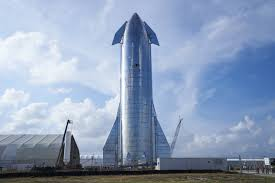



Hi everyone The intention of this notebook is plot spaceX satellite trajectory from the given data.


**Prerequiste: Knowledge of Ellipse**


Will be adding write up soon....

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [ ]:
dataFrame = pd.read_csv('/kaggle/input/spacex-all-satellites-database/SpaceX Satellite Dataset.csv')
dataFrame[0:10]

The Calculate Ellipse  Param functions calculate the Semi - Major and SemiMinor axis form Apogee and Eccentricity.

In [ ]:
def CalculateEllipseParam(eccentricity, Apogee):
    semiMajor = Apogee/(1 + eccentricity)
    semiMinor = semiMajor*pow(1 - eccentricity**2, 0.5)
    return semiMajor, semiMinor

The Calculate trajectory function cals trajectory...

In [ ]:
a, b = CalculateEllipseParam(0.000144, 561.000000)

def trajcalculator(semiMajor, semiMinor):
    xarr = np.linspace(-1*semiMajor, semiMajor, num = 100 )
    # for simpilicity just assuming earth as the centre of ellipse
    
    yarr = (((semiMajor**2) * (semiMinor**2)) - ((semiMinor**2) * (xarr**2))) / (semiMajor**2)
    yarr = yarr**0.5
    
    return xarr, yarr
    
    

In [ ]:
trajX, trajY = trajcalculator(a,b)
plt.figure(figsize=(7, 5))
plt.plot(trajX, trajY, color = 'green', label = 'Satellite Trajectory')
plt.scatter([0],[0], color = 'blue', label = 'Earth')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
def TrajectoryPlotter(dataFrame):
    plt.figure(figsize = (20, 15))
    plt.scatter([0],[0], label = 'Earth', color = 'green')
    
    df = dataFrame[['Current Official Name of Satellite', 'Eccentricity', 'Apogee (km)']].values
    for mem in df:
        name = mem[0]
        eccentricity = mem[1]
        apogee = mem[2]
        
        a, b = CalculateEllipseParam(eccentricity, apogee)
        xarr, yarr = trajcalculator(a, b)

        plt.plot(xarr, yarr, label = name)
    
    plt.grid(True)
    plt.legend()
    plt.show()
    

In [ ]:
TrajectoryPlotter(dataFrame)

In [ ]:
# Coding an interactive Plotly function for the same
import plotly
from plotly.offline import plot, iplot, download_plotlyjs, init_notebook_mode
init_notebook_mode(connected=True)

import plotly.graph_objs as go

def TrajectoryPlotter2(dataFrame):

    traceArr = []
    df = dataFrame[['Current Official Name of Satellite', 'Eccentricity', 'Apogee (km)']].values
    for mem in df:
        name = mem[0]
        eccentricity = mem[1]
        apogee = mem[2]
        
        a, b = CalculateEllipseParam(eccentricity, apogee)
        xarr, yarr = trajcalculator(a, b)

        traceArr.append(go.Scatter(
            x = xarr,
            y = yarr,
            mode = 'lines+markers',
            name = name
        ))
    
    iplot(traceArr)



In [ ]:
TrajectoryPlotter2(dataFrame)